<a href="https://colab.research.google.com/github/VincenzoLuna/Predicci-n-de-los-grados-Brix-del-mango-mediante-Machine-Learning/blob/main/RFC_and_SGBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.preprocessing import StandardScaler as SS
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import GradientBoostingClassifier as SGBC
from sklearn import datasets
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_excel('DATA MODELO.xlsx')
display(df)

,Mangos,Banda 1,Banda 2,Banda 3,Banda 4,Banda 5,Banda 6,Banda 7,Banda 8,Banda 9,...,Banda 233,Banda 234,Banda 235,Banda 236,Banda 237,Banda 238,Banda 239,Banda 240,Brix,Estado
0,1,626.076,579.849,506.845,462.092,408.753,369.939,323.891,270.200,232.037,...,2791.08,2791.27,2786.52,2771.07,2765.30,2753.51,2742.45,2734.04,7.9,No Maduro
1,2,615.260,579.379,501.610,460.970,422.049,377.674,326.156,285.999,252.657,...,3663.98,3663.14,3654.59,3642.94,3626.09,3620.50,3615.25,3607.92,7.9,No Maduro
2,3,782.474,748.101,694.113,671.739,633.956,600.651,550.643,486.231,430.967,...,3452.96,3443.75,3438.75,3424.04,3419.37,3411.91,3400.30,3389.64,19.0,Maduro
3,4,959.511,962.909,981.425,984.970,970.617,935.212,869.860,798.612,715.833,...,4472.01,4457.58,4447.63,4426.02,4411.89,4412.27,4392.55,4380.94,19.0,Maduro
4,5,982.863,990.991,1003.150,1017.730,1004.850,966.667,895.708,823.351,743.747,...,4638.51,4634.08,4624.25,4612.63,4596.68,4592.07,4582.65,4574.71,19.0,Maduro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,286,763.525,726.975,697.998,667.933,635.825,606.019,549.971,504.435,460.357,...,4777.30,4767.81,4758.74,4750.31,4742.29,4724.19,4723.97,4709.20,22.3,Maduro
286,287,682.446,607.491,569.459,521.800,482.259,444.790,396.522,355.922,318.865,...,3384.97,3375.02,3368.20,3358.63,3345.18,3338.74,3327.40,3325.51,8.3,No Maduro
287,288,767.801,747.272,712.792,688.672,649.688,607.682,556.990,508.700,456.474,...,4609.89,4594.30,4581.54,4571.01,4566.41,4553.95,4545.17,4537.84,8.3,No Maduro
288,289,1022.460,1035.100,1043.750,1049.260,1025.350,969.330,910.049,838.743,762.899,...,5245.38,5226.82,5222.56,5217.72,5218.99,5203.92,5193.91,5187.66,8.3,No Maduro


In [ ]:
mangos_df = df.drop(columns = ['Mangos','Brix'])
display(mangos_df)

,Banda 1,Banda 2,Banda 3,Banda 4,Banda 5,Banda 6,Banda 7,Banda 8,Banda 9,Banda 10,...,Banda 232,Banda 233,Banda 234,Banda 235,Banda 236,Banda 237,Banda 238,Banda 239,Banda 240,Estado
0,626.076,579.849,506.845,462.092,408.753,369.939,323.891,270.200,232.037,200.563,...,2795.36,2791.08,2791.27,2786.52,2771.07,2765.30,2753.51,2742.45,2734.04,No Maduro
1,615.260,579.379,501.610,460.970,422.049,377.674,326.156,285.999,252.657,217.306,...,3662.43,3663.98,3663.14,3654.59,3642.94,3626.09,3620.50,3615.25,3607.92,No Maduro
2,782.474,748.101,694.113,671.739,633.956,600.651,550.643,486.231,430.967,381.541,...,3459.86,3452.96,3443.75,3438.75,3424.04,3419.37,3411.91,3400.30,3389.64,Maduro
3,959.511,962.909,981.425,984.970,970.617,935.212,869.860,798.612,715.833,632.637,...,4467.83,4472.01,4457.58,4447.63,4426.02,4411.89,4412.27,4392.55,4380.94,Maduro
4,982.863,990.991,1003.150,1017.730,1004.850,966.667,895.708,823.351,743.747,653.021,...,4639.57,4638.51,4634.08,4624.25,4612.63,4596.68,4592.07,4582.65,4574.71,Maduro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,763.525,726.975,697.998,667.933,635.825,606.019,549.971,504.435,460.357,419.672,...,4775.33,4777.30,4767.81,4758.74,4750.31,4742.29,4724.19,4723.97,4709.20,Maduro
286,682.446,607.491,569.459,521.800,482.259,444.790,396.522,355.922,318.865,287.029,...,3395.16,3384.97,3375.02,3368.20,3358.63,3345.18,3338.74,3327.40,3325.51,No Maduro
287,767.801,747.272,712.792,688.672,649.688,607.682,556.990,508.700,456.474,414.491,...,4609.10,4609.89,4594.30,4581.54,4571.01,4566.41,4553.95,4545.17,4537.84,No Maduro
288,1022.460,1035.100,1043.750,1049.260,1025.350,969.330,910.049,838.743,762.899,693.757,...,5243.71,5245.38,5226.82,5222.56,5217.72,5218.99,5203.92,5193.91,5187.66,No Maduro


In [ ]:
X_df = mangos_df.drop(columns = ['Estado'])
Y_df = mangos_df['Estado']

In [ ]:
X_arr = np.array(X_df)
Y_arr = np.array(Y_df)

In [ ]:
scaler = MMS(feature_range = (0,1))
X_scaler = scaler.fit_transform(X_arr)

In [ ]:
print(np.shape(X_scaler))
Y_arr_2= np.reshape(Y_arr,(len(Y_arr),1))
print(np.shape(Y_arr_2))

(290, 240)
(290, 1)


In [ ]:
Encoder = LabelEncoder()
Encoder.fit(Y_arr)
Y_enc = Encoder.fit_transform(Y_arr)
Y_enc_2 = np.reshape(Y_enc,(len(Y_enc),1))
print(np.shape(Y_enc_2))

(290, 1)


In [ ]:
X_train,X_test,y_train,y_test = tts(X_scaler,Y_enc_2,test_size = 0.2, random_state = 80)

In [ ]:
modeloRFC = RFC(random_state = 80)
modeloSGBC = SGBC(random_state = 80)

accuracy_score_train = []
accuracy_score_test = []

for i in [modeloRFC,modeloSGBC]:
  i.fit(X_train,y_train)
  ypredtrain = i.predict(X_train)
  ypredtest = i.predict(X_test)

  acurracyscoretrain = accuracy_score(y_train,ypredtrain)
  accuracyscoretest = accuracy_score(y_test,ypredtest)

  accuracy_score_train.append(acurracyscoretrain)
  accuracy_score_test.append(accuracyscoretest)

dicc = {'Modelo':['Random Forest Classifier','Gradient Boosting Classifier']}
dicc_df = pd.DataFrame(dicc)
dicc_df['accuracy score train'] = accuracy_score_train
dicc_df['accuracy score test'] = accuracy_score_test
display(dicc_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Modelo,accuracy score train,accuracy score test
0,Random Forest Classifier,1.0,0.793103
1,Gradient Boosting Classifier,1.0,0.775862


In [ ]:
def prueba(dataprueba):
  entrada = pd.read_excel(dataprueba)
  pred = modeloRFC.predict(entrada)
  pred_1 = modeloSGBC.predict(entrada)
  prediccion = {'PRED_RFC':pred,'PRED_SGBC':pred_1}
  df_pred = pd.DataFrame(data = prediccion)
  df_pred.to_excel('datos_predichos_clasificacion.xlsx')
  return pred

In [ ]:
prueba('DATA PRUEBA.xlsx')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [ ]:

df_comp = pd.read_excel('Comparación_clasificación.xlsx')
display(df_comp)

,REAL,PRED_RFC
0,Maduro,Maduro
1,Maduro,Maduro
2,Maduro,Maduro
3,Maduro,Maduro
4,Maduro,Maduro
5,No Maduro,Maduro
6,Maduro,Maduro
7,No Maduro,Maduro
8,Maduro,Maduro
9,No Maduro,Maduro


In [ ]:
import matplotlib.pyplot as plt

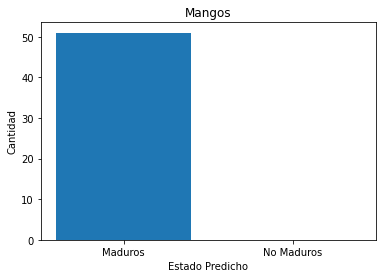

In [ ]:
Madurez = ['Maduros','No Maduros']
Cantidad =[51,0]
plt.bar(Madurez,Cantidad)
plt.title('Mangos')
plt.xlabel('Estado Predicho')
plt.ylabel('Cantidad')
plt.show()